In [1]:
# Importing essential Python libraries

import numpy as np
import pandas as pd
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Reading in the Titanic Dataset

titanic_df = pd.read_csv('train.csv')

In [5]:
# Displaying first Five rows of the Titanic Dataset

titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
# Displaying info of the Titanic Dataset

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [8]:
# Defining a new Person function

def male_female_child(passenger):
    age,sex = passenger
    
    if age < 16:
        return 'child'
    else:
        return sex

In [9]:
# Adding a new Person column to the dataset

titanic_df['person'] = titanic_df[['Age','Sex']].apply(male_female_child, axis=1)

In [10]:
# Creating a Deck statement in the dataset

deck = titanic_df['Cabin'].dropna()

In [11]:

# Assigning Deck Level letters in the Dataset

levels = []

for level in deck:
    levels.append(level[0])
    
cabin_df = DataFrame(levels)
cabin_df.columns = ['Cabin']

cabin_df = cabin_df[cabin_df.Cabin != 'T']

In [12]:
# Create a new Column called 'Levels' for the Deck levels

titanic_df['Level'] = Series(levels,index=deck.index)

In [13]:
# View the First 10 Rows of the new dataset

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Level
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,NaN
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,NaN
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,NaN


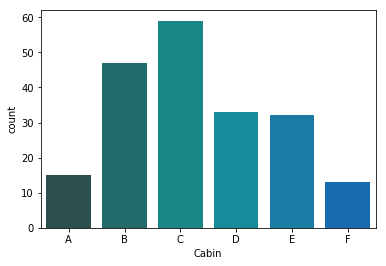

In [21]:
# Visualizing the number of people in different Deck Levels

sns.countplot(x='Cabin',data=cabin_df,order=['A','B','C','D','E','F'],palette='winter_d')

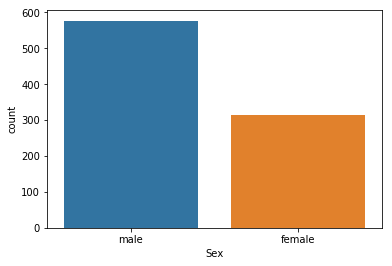

In [23]:
# Male vs Female count on the Titanic

sns.countplot('Sex',data=titanic_df)

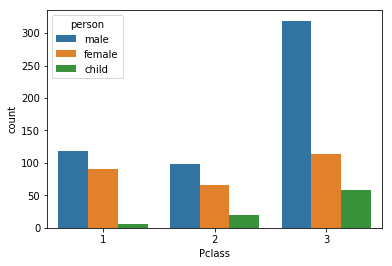

In [24]:
# Plotting the Male vs Female vs Child breakdown according to Class

sns.countplot('Pclass',data=titanic_df,hue='person')

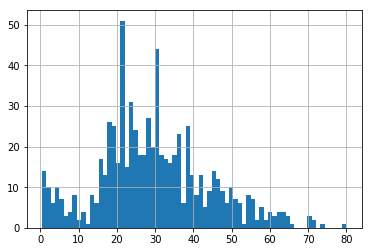

In [25]:
# Plotting the ages of the passengers on the Titanic

titanic_df['Age'].hist(bins=70)

In [26]:
# Average age of passengers on the Titanic

titanic_df['Age'].mean()

29.69911764705882

In [27]:
# Number of people who are male, female and child

titanic_df['person'].value_counts()

male      537
female    271
child      83
Name: person, dtype: int64

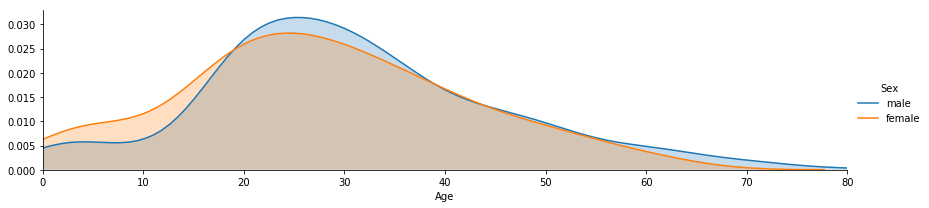

In [28]:
# KDEplot for the Ages vs Male/Female

fig = sns.FacetGrid(titanic_df,hue='Sex',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

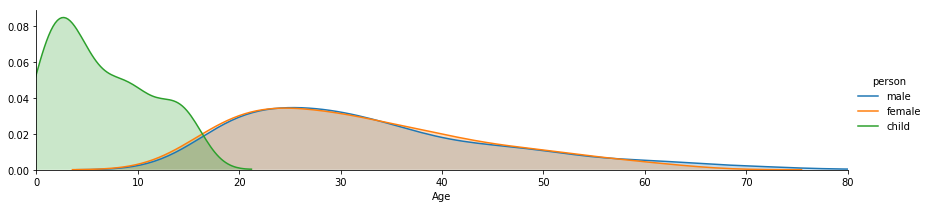

In [29]:
# KDEplot for the Ages vs Male/Female/Child

fig = sns.FacetGrid(titanic_df,hue='person',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

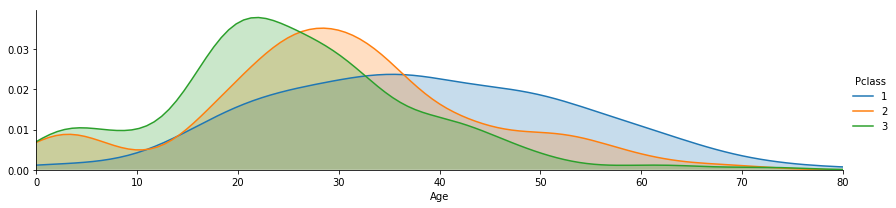

In [30]:
# KDEplot for the Ages vs Passenger Class

fig = sns.FacetGrid(titanic_df,hue='Pclass',aspect=4)
fig.map(sns.kdeplot,'Age',shade=True)

oldest = titanic_df['Age'].max()
fig.set(xlim=(0,oldest))
fig.add_legend()

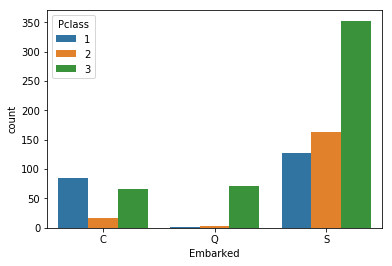

In [33]:
# Plotting the Class of Passengers embarked from different locations

sns.countplot('Embarked',data=titanic_df,hue='Pclass',order=['C','Q','S'])

In [34]:
# Creating a new column for People who were travelling alone

titanic_df['Alone'] = titanic_df.SibSp + titanic_df.Parch

In [35]:
# Assigning relevant strings to the different values of the Alone column

titanic_df['Alone'].loc[titanic_df['Alone'] > 0] = 'With Family'

titanic_df['Alone'].loc[titanic_df['Alone'] == 0] = 'Alone'

C:\Users\Goody\Anaconda3\lib\site-packages\pandas\core\indexing.py:190: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


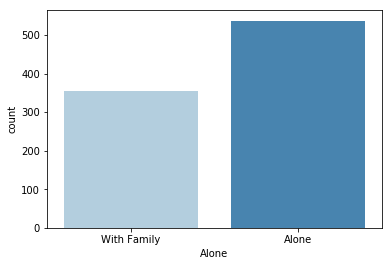

In [36]:
# Counting the passengers who were travelling alone vs who were with family

sns.countplot('Alone',data=titanic_df,palette='Blues')

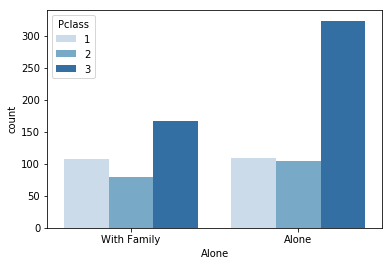

In [37]:
# Family vs Alone passengers according to their Class breakdown

sns.countplot('Alone',data=titanic_df,palette='Blues',hue='Pclass')

In [38]:
# Creating a new Survivor column

titanic_df['Survivor'] = titanic_df.Survived.map({0 : 'no', 1 : 'yes'})

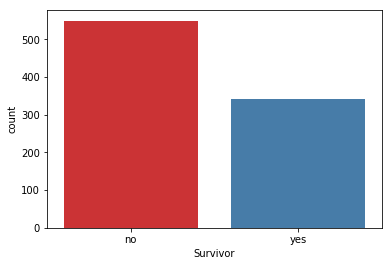

In [39]:
# Counting the number of Survivors on the Titanic

sns.countplot('Survivor',data=titanic_df,palette='Set1')

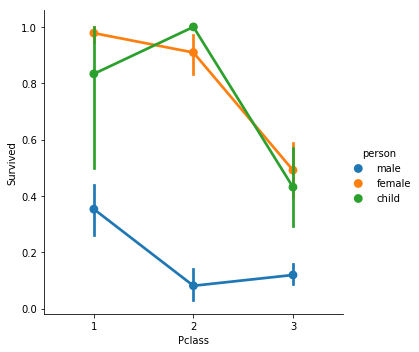

In [42]:
# Being a Male/Female/Child travelling on different Classes and the chances of survival

sns.factorplot('Pclass','Survived',data=titanic_df,hue='person')

In [43]:
# Defining a new Bin

generations = [10,20,40,60,80]

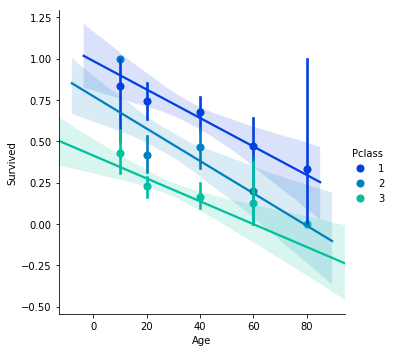

In [44]:
# Plotting the Age, Survival rate and the Passenger Class

sns.lmplot('Age','Survived',hue='Pclass',data=titanic_df,palette='winter',x_bins=generations)

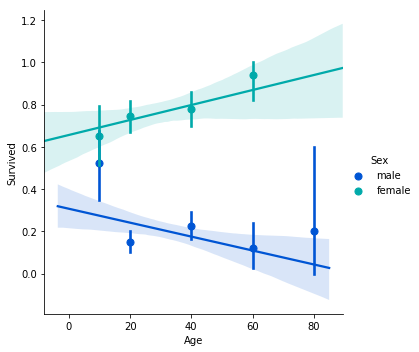

In [45]:
# How Age and the Sex had an impact on the Survival rate

sns.lmplot('Age','Survived',hue='Sex',data=titanic_df,palette='winter',x_bins=generations)

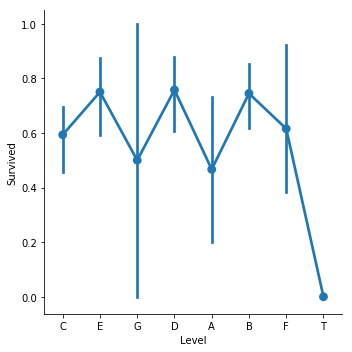

In [46]:

# How the Deck level had an impact on the Survival rate

sns.factorplot('Level','Survived',x_order=['A','B','C','D','E','F'],data=titanic_df)

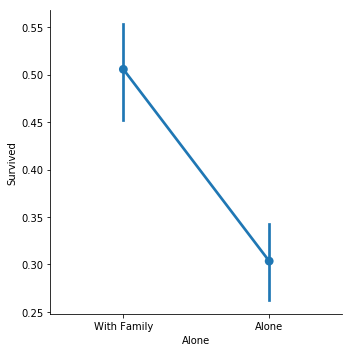

In [47]:
# How being with a Family or alone had an impact on the Survival rate

sns.factorplot('Alone','Survived',data=titanic_df)

In [48]:
# Final Dataset Top 10 Rows

titanic_df[0:10]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Level,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,NaN,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,C,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,NaN,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,C,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,NaN,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,NaN,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,E,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,NaN,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,NaN,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,NaN,With Family,yes
